# <center> ANALYSIS OF FACTORS THAT INFLUENCE FOOD INSECURITY </center>

### <center> Sonali Subbu Rathinam  </center>
#### <center> December 2021 </center>



### __INTRODUCTION:__ 
<br>
According to the Food and Agriculture Organization (FAO), food insecurity is defined as the lack of regular access to enough safe and nutritious food for normal growth and development and an active and healthy life. The second target of the UN’s Sustainable Development Goals (SDG) for 2030 is zero hunger, and prioritizes achieving food security. Given these definitions and targets that underscore the importance of food security, this paper aims at studying the effects of various factors that affect food security levels in different countries over the years. 
<br><br>
The effect of various candidate drivers on the Global Food Security Index (GFSI), which is a country-level food security measurement tool, has been analyzed in this paper. This has been achieved by implementing Linear Regression, Support Vector Regression, Decision Trees and Random Forests. The unit of analysis of the models is country-level data of the Global Food Security Index and the candidate drivers for two-year periods from 2013 to 2018. Exploratory Analysis of training data was followed by the implementation of machine learning models. From the results, we identify that at the trans-national level Poverty, Logistics Performance Indicator and the percent of salaried employees are key factors that influence food security levels. It is also observed that a country’s measure of agricultural land quantity and quality and net food trade do not significantly impact food security levels. Additionally, presence of climate change performance reports in countries has negligible effect on food security levels. The rest of this paper explains the reasons and methods employed in obtaining the candidate determinants and the GFSI index, and regression models used. The precision of the models on both the training and testing data using mean squared error are reported as well. 
<br><br><br>

### __Problem Statement and Background:__

Despite zero hunger being an SDG target, moderate and severe food insecurity has only increased in the last decade. Recent reports by the FAO indicate that more than two billion people lack regular access to safe, nutritious, and sufficient food and an estimated 821 million people are not able to acquire enough food to meet minimum dietary energy requirements. These revelations have motivated the aim of the project, which is _to analyse the impact of potential causes of food security levels in countries_. Hence, the GFSI value for the reported countries is used as the target variable for the analysis. The variable importance of the various predictors chosen, or the impact of various factors on GFSI, are studied using permutation importance. The process of repeatedly rearranging data order of each predictor, and then using it to train and predict the data helps in analysing variable importance and also provides a comparison on the impact of the predictors on the target variable. Once the important factors are identified, the interactions between these factors are visualised and studied. 
<br><br>
Allee, Lynd and Vaze (2021) conducted a cross-national analysis of food security drivers by using the Food Insecurity Experience Scale and the Global Food Insecurity Index. They analyse the impact of various determinants on both these indices’ 2019 report on 65 countries. Their results indicate that per capita household final consumption expenditure (HFCE) is the strongest determinant of both the measures of food security. They also demonstrate that the quantity and quality of agricultural productivity in a country do not significantly impact either of the indices. Some of the predictor variables used in this paper coincide with few of the predictors used in the aforementioned research paper; and the results of those predictors are consistent in the models used in this paper as well.  
<br><br><br>

### __Data Description:__
<br>
The Global Food Security Index ranks 113 countries on the basis of 58 indicators that are associated with the following categories: food affordability, availability, quality and safety, and natural resources and resilience.  Countries are ranked on a scale of 100 on these factors, and the weighted mean of each category is then used in reporting the final GFSI value for a given year. Hence, a higher GFSI value implies that a country has high levels of food security. For this project the GFSI index from years 2012 to 2018 will be used as the target variable, and it has been obtained through web-scraping. Specifically, the BeautifulSoup package of Python has been used for html parsing. Given that GFSI scores’ measurement is based on the aforementioned categories, the following indicators have been included as predictors: <br>

- <u>Arable Land:</u> Arable Land refers to any land that is capable being ploughed and suitable for agriculture. The project uses   Arable Land measured in hectares per person. This is a measure of agricultural land quantity in a country. This has been included in the model as the increased availability of land area for growing crops can potentially result in higher food production in a country, and we explore the influence of this factor on food security levels. The data for Arable land per capita for every country in a given year has been obtained by importing World Bank data. <br><br>

- <u>Cereal Yield:</u> Cereal Yield, which is measured in kilograms per hectare, includes a wide variety of crops. This is a measure of agricultural land quality in a country. The soil fertility and other land-based resources in a country might be much more favourable for increased yield as compared to others; hence it is included in the model to study its effect on food security. The data for Cereal Yield in kilogram per hectare for each country in a given year has been obtained by importing World Bank data.<br><br>

- <u>Wage and Salaried Workers:</u> Wage and salaried workers (employees) are those workers who hold the type of jobs defined as "paid employment jobs", where the incumbents hold explicit (written or oral) or implicit employment contracts that give them a basic remuneration. This is measured as their percent in total population. When people receive a basic remuneration, they are able to afford food; hence this has been included as a predictor in the model. This is also consistent with the food affordability category. The data for Wage and Salaried Workers in a country for a given year has been obtained by importing World Bank data.<br><br>

- <u>Logistics Performance Indicator:</u> Logistics Performance Index (LPI) reflects perceptions of a country's logistics based on survey responses of companies and individuals employed in both national and international trade and transport. This variable has been included as food security is also associated with accessibility, and having a strong trade and transport infrastructure in a country implies that food is available even in the rural and remote areas of a country. Hence, this is consistent with the food availability category. The LPI index ranges from 1 to 5, with a higher score representing better performance. The data for LPI scores has been obtained through web-scraping. Specifically, the BeautifulSoup package of Python has been used for html parsing. The LPI scores for a country are measured every two years. <br><br>

- <u>Poverty:</u> The poverty head count ratio includes those whose income is below a specific consumption level. The World Bank defines extreme poverty as individuals whose income is below 1.9 USD per day. This international poverty line is used to obtain the share of a country’s population living in extreme poverty; and is used in this project. It is an indicator of whether individuals have enough economic resources for food affordability. The data for poverty share in a country in a given year has been obtained by reading in csv files in Python published by the World Bank.<br><br>

- <u>Climate Change Performance Index:</u> Germanwatch e.V. produces an annual report of climate protection policies in countries, based on their performances in 14 climate policy indicators. Climate change has had detrimental effects on agriculture. Therefore, this variable has been included to account for this effect. This is also consistent with the natural resources and resilience category. The data for Climate Change Performance Index (CCPI) of countries has been obtained through web-scraping. Again, the BeautifulSoup package is used for html parsing. As this index is only reported for a few countries over the years, this has been converted into a dichotomous variable; where 1 indicates that the CCPI index of a country is available, and 0 otherwise. This is a reflection of transparency of climate-based indicators in a country. <br><br>

- <u>Net Food Trade:</u> This variable has been included after considering the following two situations; (i) The weather and soil conditions in some countries may not be ideal for high agricultural productivity, and meet their food requirements mostly through imports, (ii) A country may have high agricultural productivity in only a few crops; but including this factor would account for availability of a variety of food crops. The data has been obtained by reading in excel files published by the World Integrated Trade Solution. The data includes overall food exports and food imports of a country for a given year. The net food trade has been calculated by obtaining the difference between food exports and imports for a country in a given year. This has been done as it captures the overall food availability. 
<br><br><br>
After obtaining the target and predictor variables, they were merged on country name and year to form the final data to be used in the project. Before merging, all the country names in each variable have been converted to the ‘short-name’ format using the country convertor package in python. This has been done to ensure that final data does not contain any duplicates and the merging occurs without any errors. As the LPI scores are measured for every two years, all the other variables have been converted to two-year data by obtaining the mean value of the variables for the two-year groups for each country. Hence, the final unit of analysis of the project is country-level data for two-years. Once merging is complete, the rows containing missing values from the data (which were few compared to the sample size), were removed.  Additionally, the years have been converted into a series of dummy variables, with the 2013–2014 sub-group dropped as the reference category. <br>
On exploratory training analysis of the predictor variables, a right skew is observed on Arable Land, Cereal Yield and Poverty Share variables. Hence, these variables have been logged before using them in the machine learning models.<br><br> 

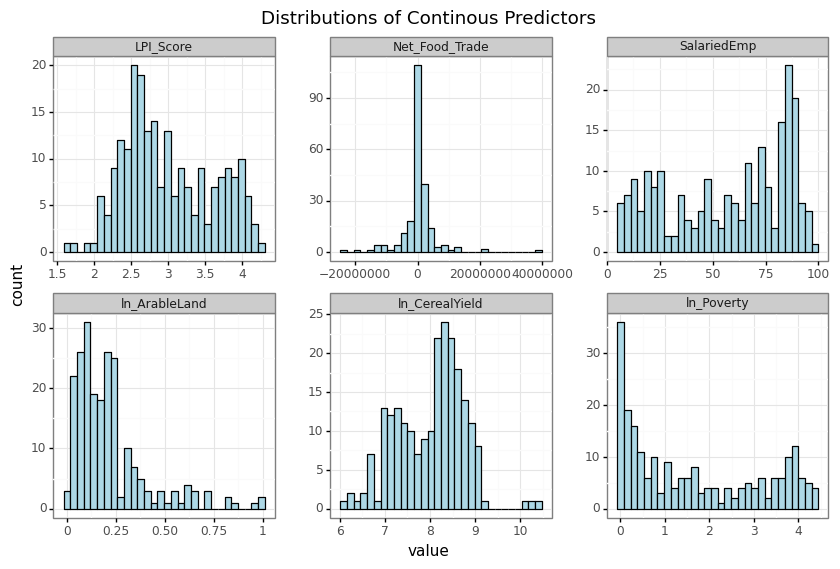

<br><br>
It is also observed that the LPI score, Percent of Salaried Employees and logged Cereal Yield are positively correlated with the target variable, GFSI. On the contrary, logged Poverty Share is negatively correlated with the target variable. Net Food trade does not show any significant correlation; most of its values are around zero with a few outliers on both the positive and negative side; indicating that some countries have been net importers/exporters of food. For logged Arable Land, no clear correlation is observed; and the interpretation from the outliers is that a few countries have considerably more land available for agriculture as compared to the others. <br><br>

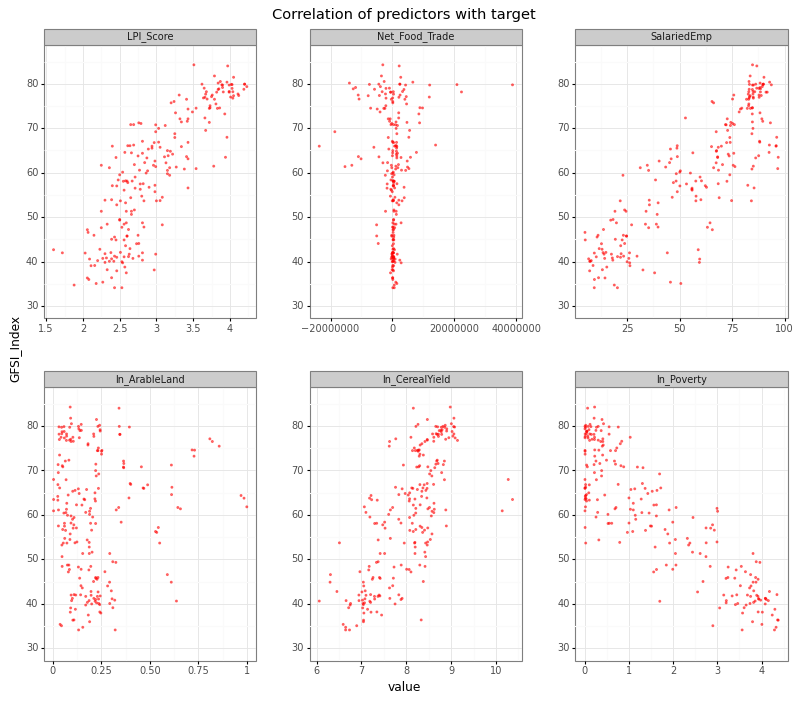

<br><br><br>
### __Analysis:__
<br><br>
The data has been split into training and testing data in a 75:25 ratio. The data is being scaled as the variables present in the data are measured in different scales. They would contribute equally to the model fit; and the effect of one variable may overpower the other; thus, resulting in a biased model. In order to overcome this, the Min-Max scaler has been used to pre-process the data. The Min-Max scaler takes the value of each variable in the model; finds its difference with the minimum value of the variable; and then divides it by its range. This would ensure that the shape of the original distribution is maintained. However, it may be overfitting for the outliers observed in the logged Arable Land variable. <br><br>

Regression models are implemented in the data once it has been pre-pre-processed. Regression models are used as they model the target variable based on the independent variables. This is consistent with the aim of the project; which is to model the GFSI value based on the candidate determinants. The following regression models are used on the data: <br>

- Linear Regression: This model produces estimates of the predictor variables that minimize the sum of the squared residuals; i.e., minimize the distance between the observed values from the fitted line of the model. However, this model works best when the all the independent variables exhibit a linear relationship with the target variable. From the exploratory training analysis, it is observed that some predictors are in a non-linear relationship with the target variable. Yet, it is used because of its simplicity and it helps determine the effect of each predictor variable on the target variable. <br>

- Support Vector Regression: While the previous model aims at minimizing the sum of squared errors; support vector regressions allow users to define the threshold for how much error is acceptable in the model; and finds the best hyperplane to fit the data. This model is also robust to outliers, thus overcoming the drawbacks of the previous model. The Radial Basis function (RBF) has been provided as a hyper tuning parameter for the model. This kernel computes the similarity of any two given points based on how close they are. Hence, a larger distance implies more dissimilarity. <br>

- Decision Trees: Decision Trees are used for regression as it also captures non-linearity present in the data. In this model, data is split into smaller subsets which eventually leads to a tree-like structure. Every point in the data runs through the entire tree based on the specific condition at each level, until it reaches the leaf node. This model is useful for interpreting relationships between the predictors and target variables. However, it may have slight over-fitting; which is resolved in the next model explained. <br>

- Random Forest Regressors: This model uses multiple decision trees; hence it makes its prediction based on multiple models. Each of the trees used is based on a random subset of the data. These features of the model reduce the over-fitting concerns present in the decision tree model. <br>
<br><br>

### __Result:__
<br><br>
The above regression models were implemented once the data was pre-processed through a machine learning pipeline. It is observed that the random forest regressor model was the best model on the training data. This result is consistent with the analysis of the models; as random forest regression overcomes the drawbacks of the other models. Mean squared error is the average squared difference between the estimated value from the model and the true value. A smaller mean squared error value is preferred, as it would imply that the distribution of the data is not skewed, implying that the errors are small. Python API reports the negative of the mean squared error. For the random forest regression model, negative mean squared error of -16.82 was reported. When the same model was implemented on the test data, the mean squared error reported was 15.33 As the absolute value of the mean squared error is similar on both the training and testing data, it confirms that the model performs well. The R squared for the model is 0.914, which indicates that the variation in our target variable GFSI index is well explained by the predictor variables used in the model. <br><br>
Through permutation importance, it is observed that logged Poverty is used extensively in predicting the GFSI value. This implies that poverty levels heavily influence GFSI value. We also observe a smaller impact of LPI scores and percent of salaried employees on a country’s food security levels. Hence, if Poverty values are reduced and LPI scores and percent of salaried workers increase, the food security situation in a country can significantly improve.  This interpretation is also supported by the partial dependency plots of these variables. Both logged Arable Land and logged Cereal yield have an insignificant impact on the food security levels. The CCPI index also doesn’t affect food security levels. However, this was based only on the transparency of climate policies in a country, and not on their impacts. Hence, immediate conclusions about the CCPI index cannot be made. It is observed that net food trade has the least value through permutation importance. But the model does not explicitly deal with the countries that are net importers/exporters, hence modifications need to be done on the variable to accurately interpret its effect. <br><br> 

#### <left> Variable Importance Table </left>
<br>

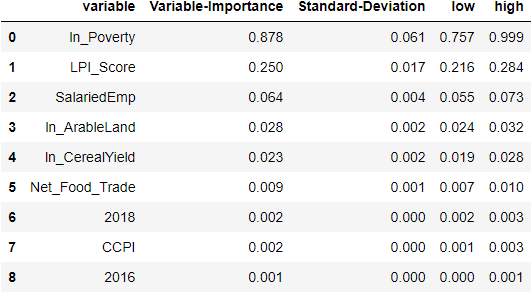
<br><br>

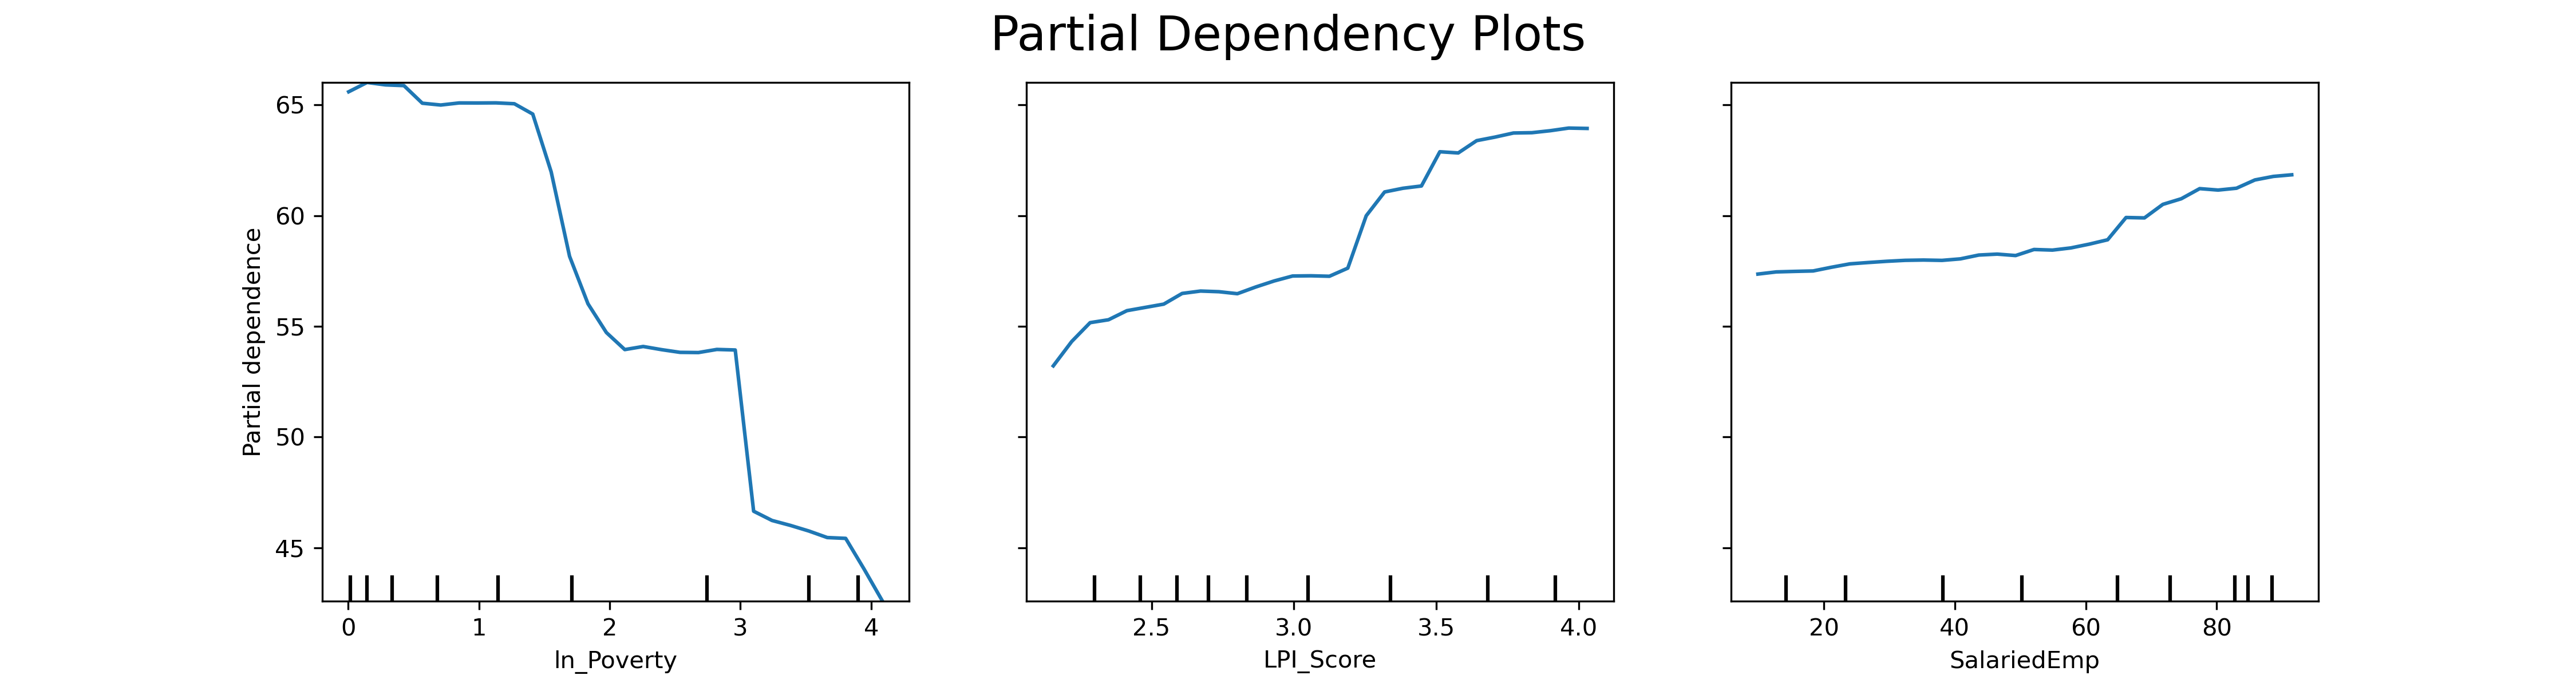

<br><br>
The interaction between logged Poverty, LPI scores and Salaried employees were then analysed. It is observed that for higher values of logged poverty, the LPI score does not create any significant impact, only for lower values of poverty, a higher LPI score would improve food security levels in a country. A similar result was obtained for the interaction between logged poverty and salaried employees. While countries with extremely high percent of salaried employees do not report extremely low values of LPI scores, higher values of LPI scores are also observed in countries with lower percent of salaried employees. 
<br><br><br>

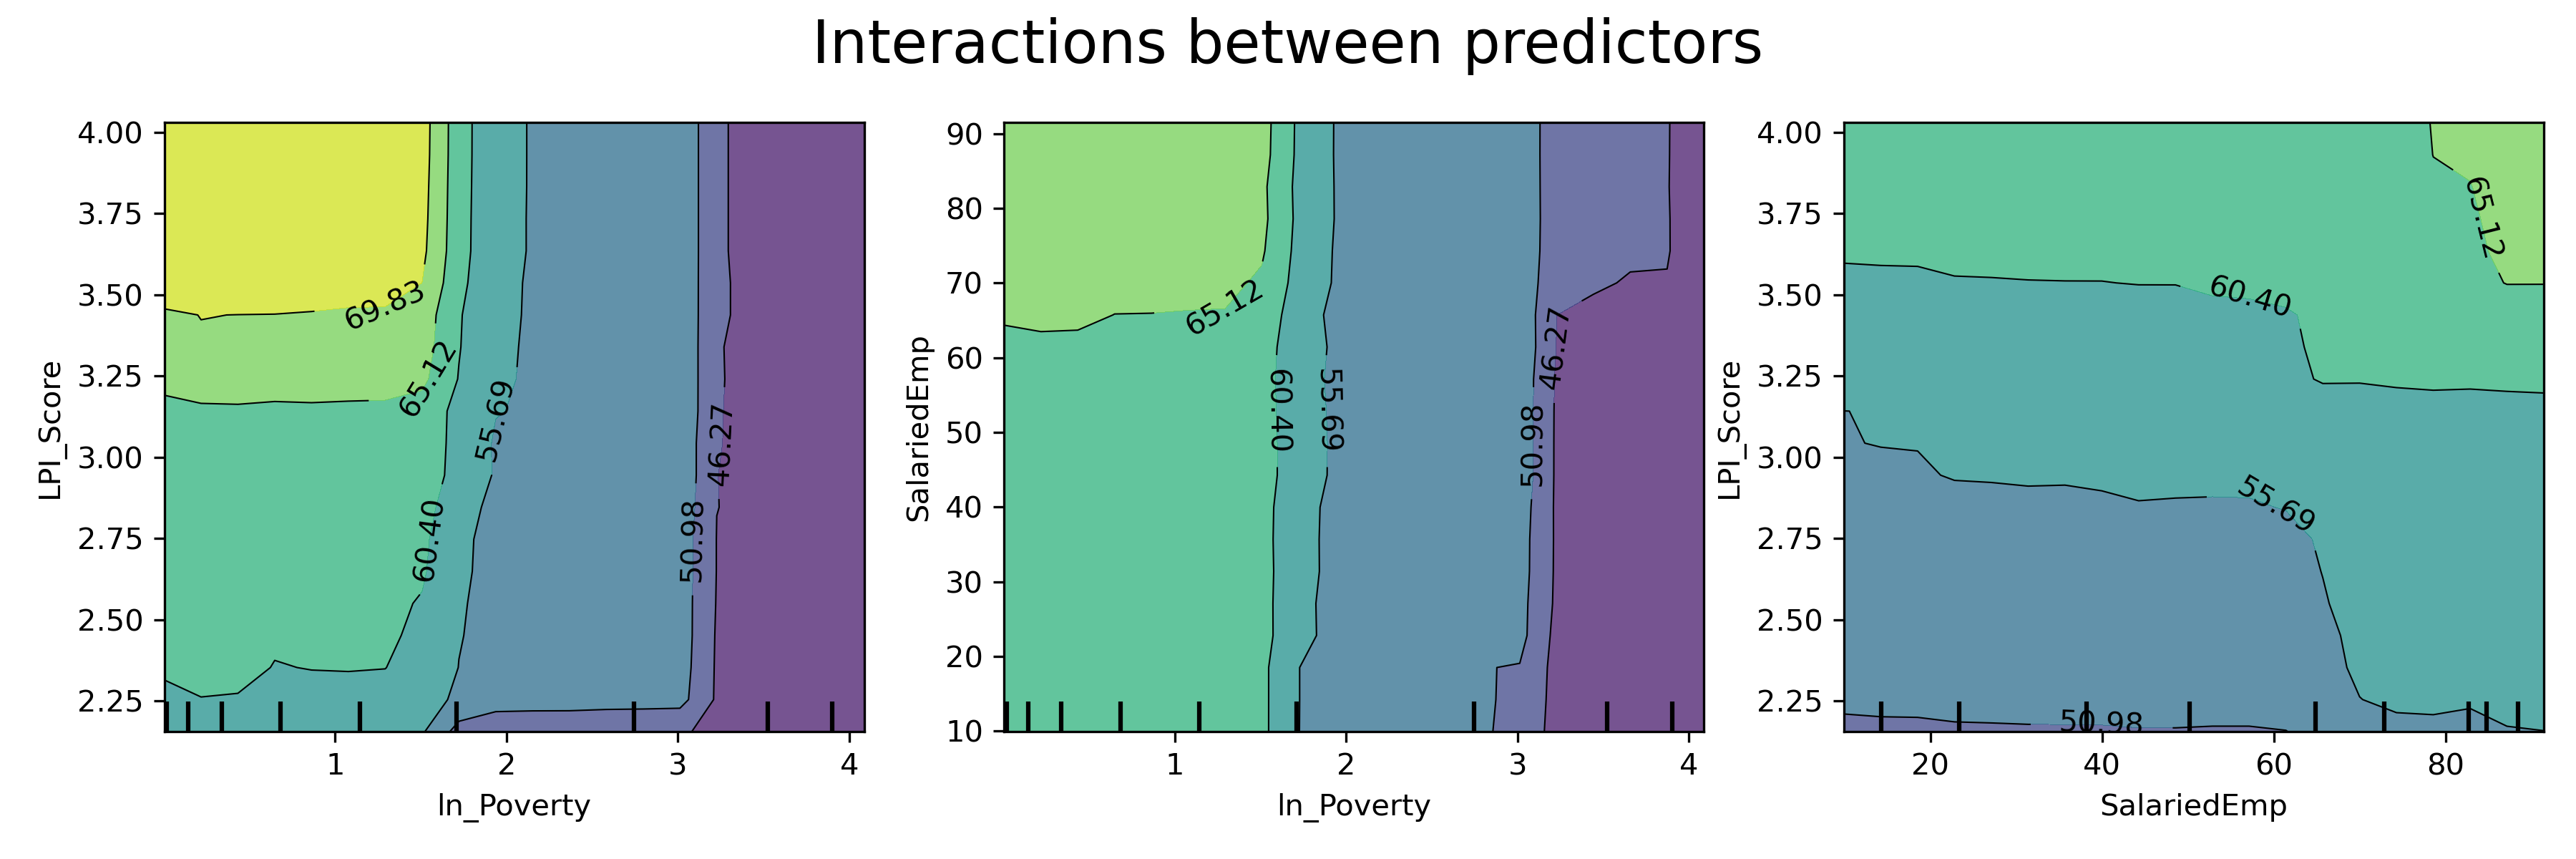

<br><br><br>
### __Final Discussion:__
<br>
The main aim of the project was to analyse the impact of potential causes of food security levels in countries. From the regression model’s result, we observe that poverty is the major determinant of food security levels in a country. Additionally, in-country agricultural quantity and quality do not significantly impact food security levels. This project only analysed few among the various factors that could possibly affect food security. The initial phases of the project included home-ownership rate as a predictor variable as well, as high rents and high affordability of home ownership make people reduce their overall consumption. Eventually it couldn’t be used due to large number of missing values. Hence, future scope of this project would include appropriate imputation methods to analyse the effect of home-ownership on food insecurity. The CCPI index can be converted into categories based on their scores; this would provide a better interpretation of the effect of climate change on cross-country food security levels. Finally, better practises of anomaly detection and analysing the effect with/without them would provide clearer insight, especially for the net food trade predictor. 
<br><br>

### References: 

- Allee, Lynd, Vaz; Cross-national analysis of food security drivers: comparing results based on the Food Insecurity Experience Scale and Global Food Security Index; 2021
- www.towardsdatascience.com
- www.medium.com

